In [112]:
import pandas as pd
import seaborn as sns
from joblib import load
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from termcolor import colored

In [114]:
X_train, X_test, Y_train, Y_test = load('../../preprocessing/classification_dataset.joblib')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39664 entries, 32160 to 47684
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   stop_time                         39664 non-null  float64
 1   driver_gender                     39664 non-null  int64  
 2   driver_age                        39664 non-null  float64
 3   search_conducted                  39664 non-null  int64  
 4   drugs_related_stop                39664 non-null  int64  
 5   stop_month                        39664 non-null  int64  
 6   stop_day                          39664 non-null  int64  
 7   Asian                             39664 non-null  uint8  
 8   Black                             39664 non-null  uint8  
 9   Hispanic                          39664 non-null  uint8  
 10  Other                             39664 non-null  uint8  
 11  White                             39664 non-null  uint8  
 12  

In [ ]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Nije uhapšen', 'Uhapšen'], index=['0', '1']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['Nije uhapšen', 'Uhapšen'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

## Stablo odlučivanja

In [ ]:
dtc = DecisionTreeClassifier()

In [117]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

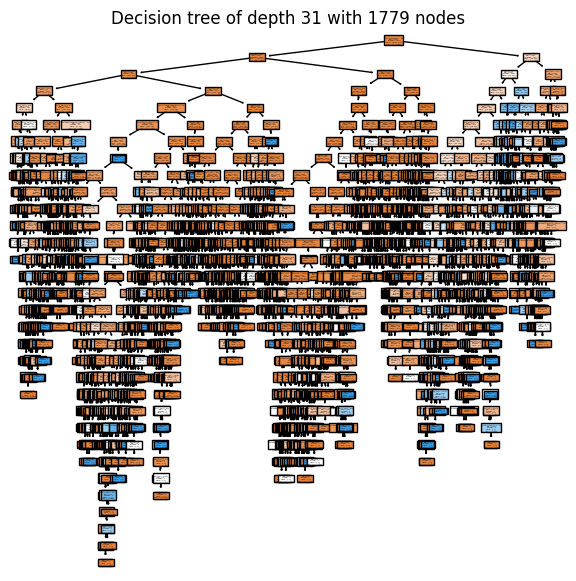

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [118]:
feature_names = X_train.columns
plot_decision_tree(dtc, feature_names)

Takođe, možemo prikazati i koji atributi su bili od najvećeg značaja prilikom formiranje stabla odlučivanja.

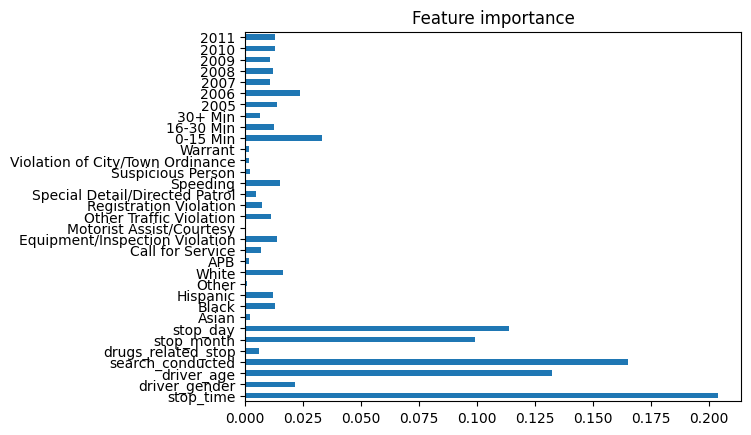

In [119]:
pd.Series(dtc.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [120]:
report(dtc, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38169
           1       1.00      0.98      0.99      1495

    accuracy                           1.00     39664
   macro avg       1.00      0.99      1.00     39664
weighted avg       1.00      1.00      1.00     39664

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         38169        0
1            23     1472
---------------------------------------------------------------------------------


In [121]:
report(dtc, X_test, Y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9542
           1       0.33      0.36      0.34       374

    accuracy                           0.95      9916
   macro avg       0.65      0.66      0.66      9916
weighted avg       0.95      0.95      0.95      9916

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0          9267      275
1           241      133
---------------------------------------------------------------------------------


Pokušaćemo da unapredimo model promenom hiper-parametara.

# Podešavanje hiper-parametara

## GridSearchCV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [122]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 4, 6, 8]
         }

In [123]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

In [124]:
estimator_dtc.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

Možemo pogledati koja je najbolja kombinacija parametara.

In [125]:
estimator_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 4}

Kao i najbolji score.

In [126]:
estimator_dtc.best_score_

0.9657119818650012

In [127]:
report(estimator_dtc.best_estimator_, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38169
           1       0.70      0.17      0.27      1495

    accuracy                           0.97     39664
   macro avg       0.83      0.58      0.63     39664
weighted avg       0.96      0.97      0.96     39664

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         38063      106
1          1246      249
---------------------------------------------------------------------------------


In [128]:
report(estimator_dtc.best_estimator_, X_test, Y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9542
           1       0.69      0.18      0.28       374

    accuracy                           0.97      9916
   macro avg       0.83      0.59      0.63      9916
weighted avg       0.96      0.97      0.96      9916

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0          9513       29
1           308       66
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate cross validacije.

In [129]:
estimator_dtc.cv_results_

{'mean_fit_time': array([0.02567768, 0.03727992, 0.04944515, 0.06128677, 0.02510309,
        0.03847671, 0.05096253, 0.06386105]),
 'std_fit_time': array([0.00104845, 0.00012886, 0.00044479, 0.00056833, 0.0006531 ,
        0.00035638, 0.00057083, 0.00085251]),
 'mean_score_time': array([0.00431061, 0.00431514, 0.00435917, 0.00406194, 0.0043141 ,
        0.00432205, 0.00432841, 0.00475057]),
 'std_score_time': array([4.55698223e-04, 4.75326808e-04, 4.46543098e-04, 5.19395116e-05,
        4.75642669e-04, 4.69853077e-04, 4.65986184e-04, 5.39083768e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

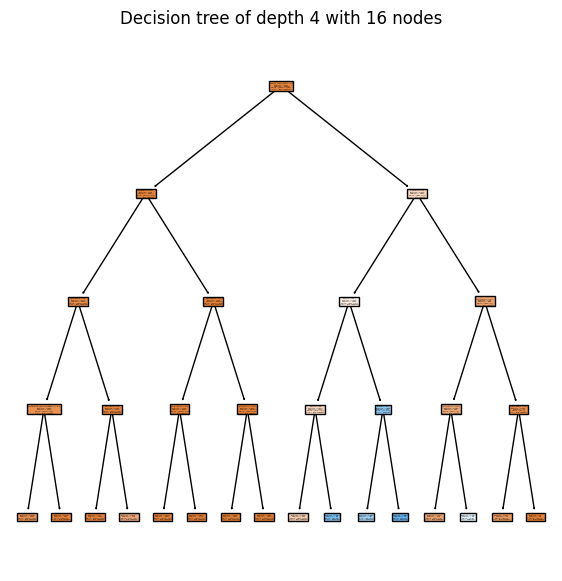

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 4
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [130]:
plot_decision_tree(estimator_dtc.best_estimator_, feature_names)

## Slučajne šume

In [131]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

report(random_forest, X_train, Y_train)

report(random_forest, X_test, Y_test, "test")

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38169
           1       1.00      0.99      0.99      1495

    accuracy                           1.00     39664
   macro avg       1.00      0.99      1.00     39664
weighted avg       1.00      1.00      1.00     39664

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         38167        2
1            22     1473
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on test data
--------------------------------------------------------------

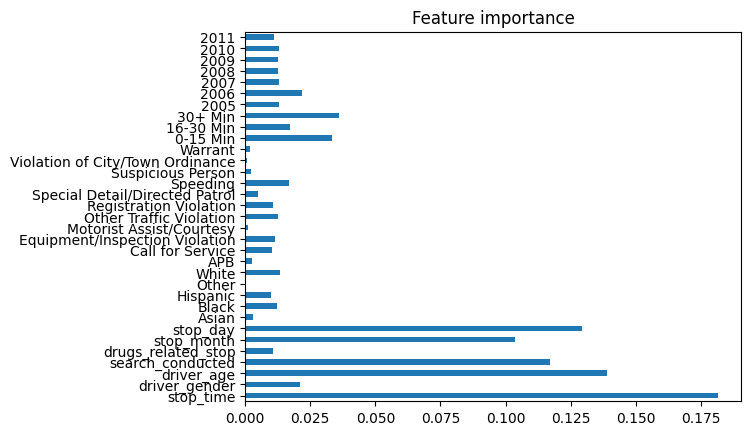

In [132]:
pd.Series(random_forest.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [133]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 150, 200]
}

estimator_rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params, cv=3)

In [134]:
estimator_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 150, 200]})

In [135]:
estimator_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 150}

In [136]:
estimator_rfc.best_score_

0.9652833727237744

In [137]:
report(estimator_rfc.best_estimator_, X_train, Y_train)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38169
           1       1.00      0.99      0.99      1495

    accuracy                           1.00     39664
   macro avg       1.00      0.99      1.00     39664
weighted avg       1.00      1.00      1.00     39664

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         38166        3
1            20     1475
---------------------------------------------------------------------------------


In [138]:
report(estimator_rfc.best_estimator_, X_test, Y_test, "test")

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9542
           1       0.64      0.22      0.33       374

    accuracy                           0.97      9916
   macro avg       0.80      0.61      0.65      9916
weighted avg       0.96      0.97      0.96      9916

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0          9495       47
1           292       82
---------------------------------------------------------------------------------


In [139]:
estimator_rfc.cv_results_

{'mean_fit_time': array([1.57611942, 2.34798884, 3.15831963, 1.64099558, 2.46584439,
        3.31240686, 1.646703  , 2.45948807, 3.30785728]),
 'std_fit_time': array([0.02955717, 0.01150691, 0.03337008, 0.01312984, 0.00524264,
        0.04089244, 0.01964296, 0.01404026, 0.0134488 ]),
 'mean_score_time': array([0.14906764, 0.22249063, 0.29392163, 0.14616378, 0.2181832 ,
        0.28970798, 0.14565547, 0.21780038, 0.29003851]),
 'std_score_time': array([0.00123893, 0.00300404, 0.00309151, 0.00166389, 0.00061903,
        0.0027559 , 0.00105102, 0.00219459, 0.001503  ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'log_loss', 'log_loss', 'log_loss'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 200, 100, 150, 200, 100, 150, 200],
              mask=[False, Fa

# Poređenje dobijenih modela

Napravili smo više modela, sada je pitanje koji od njih najbolje rešava problem klasifikacije. Naravno, ne možemo zaključiti samo na osnovu preciznosti modela. Za poređenje koristimo ROC krivu.

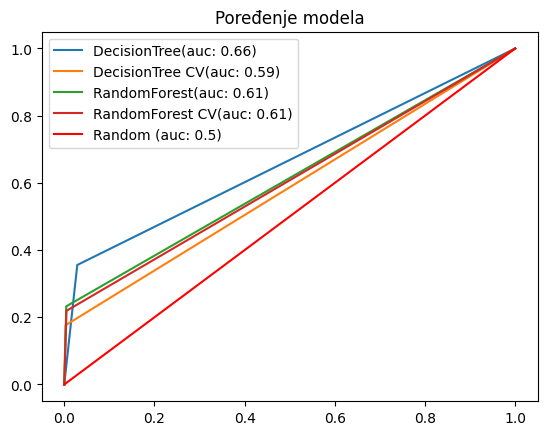

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator_dtc.best_estimator_, random_forest, estimator_rfc.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Biramo model sa najvećom AUC vrednošću - DecisionTree.